In [60]:
import cv2
import math 
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

In [61]:
def sampel(im):
    x=np.array([])
    for i in range(10):
        for j in range(10):
            x=np.append(x,im[1500+i][500+j])
    x = x.reshape(10,10,3)
    return x

def sampel2(im):
    x=np.array([])
    for i in range(10):
        for j in range(10):
            x=np.append(x,im[1500+i][500+j])
    x = x.reshape(10,10)
    return x

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

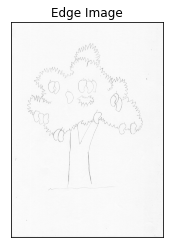

In [62]:
img = cv2.imread('dataset/scan/daun/0-001.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# plt.imsave('gray.jpg' ,gray,cmap='gray')
im_canny = cv2.Canny(gray,75,150)
# plt.imsave('canny.jpg' ,im_canny,cmap='gray')

plt.subplot(122),plt.imshow(gray,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

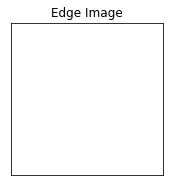

In [63]:
rgb = sampel(img)
plt.subplot(122),plt.imshow(rgb,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [64]:
a=9
for i in range(10):
    print(int(rgb[a][i][0]),
    int(rgb[a][i][1]),
    int(rgb[a][i][2]))

246 247 245
248 246 245
249 247 246
251 249 248
253 251 250
248 246 245
246 244 243
243 244 242
255 255 254
244 245 243


In [65]:
gry = sampel2(gray)
for i in range(10):
    print(int(gry[i][0]))

212
167
192
198
252
238
244
252
244
246


In [66]:
im_gray = cv2.imread('dataset/scan/daun/0-001.jpg',cv2.IMREAD_GRAYSCALE)
x=np.array([])
for i in range(14):
    for j in range(14):
        x=np.append(x,im_gray[1500-2+i][500-2+j])
x_gray = x.reshape(14,14)

In [67]:
for i in range(14):
    print(int(x_gray[12][i]))

245
248
253
255
247
238
247
242
245
240
250
242
249
250


In [68]:
im_gray = cv2.imread('dataset/scan/daun/0-001.jpg',cv2.IMREAD_GRAYSCALE)
canny = cv2.Canny(im_gray,75,150)
x=np.array([])
for i in range(10):
    for j in range(10):
        x=np.append(x,canny[1500+i][500+j])
x_canny = x.reshape(10,10)
x_canny

array([[255., 255., 255., 255.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255., 255., 255., 255.],
       [255., 255.,   0.,   0.,   0., 255.,   0.,   0.,   0., 255.],
       [  0., 255., 255., 255.,   0.,   0.,   0., 255.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255.,   0., 255., 255.,   0., 255.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255., 255., 255., 255.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [69]:
retval, threshold = cv2.threshold(x_canny, 127, 1, cv2.THRESH_BINARY)
threshold

array([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 1., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [70]:
moments = cv2.moments(threshold)
moments

{'m00': 26.0,
 'm10': 129.0,
 'm01': 82.0,
 'm20': 867.0,
 'm11': 476.0,
 'm02': 362.0,
 'm30': 6411.0,
 'm21': 3364.0,
 'm12': 2202.0,
 'm03': 1762.0,
 'mu20': 226.96153846153845,
 'mu11': 69.15384615384613,
 'mu02': 103.38461538461536,
 'mu30': -142.8106508875744,
 'mu21': -56.60355029585821,
 'mu12': -30.27810650887602,
 'mu03': -31.810650887573956,
 'nu20': 0.33574192080109244,
 'nu11': 0.1022985889849795,
 'nu02': 0.15293582157487481,
 'nu30': -0.04143117294177451,
 'nu21': -0.01642140461408806,
 'nu12': -0.008784060987903936,
 'nu03': -0.0092286714619838}

In [78]:
huMoments = cv2.HuMoments(moments)
huMoments

array([[ 4.88677742e-01],
       [ 7.52780751e-02],
       [ 1.83022059e-03],
       [ 3.17949612e-03],
       [ 7.50746103e-06],
       [ 8.67737749e-04],
       [-1.57011155e-06]])

In [79]:
for i in range(0,7):
    huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))
huMoments

array([[ 0.31097744],
       [ 1.12333149],
       [ 2.73749656],
       [ 2.4976417 ],
       [ 5.12450691],
       [ 3.06161151],
       [-5.80406949]])

In [14]:
x=2
y=0
nu20 = moments['mu20']/moments['m00']**((x+y)/2+1)
nu20

0.3357419208010924

In [15]:
moments['m00']**((x+y)/2+1)

676.0

In [16]:
len(x)

TypeError: object of type 'int' has no len()

In [17]:
print(im[50][75][0])

NameError: name 'im' is not defined

In [18]:
gray = 0.299*im[50][75][0]+0.587*im[50][75][1]+0.114*im[50][75][2]
gray

NameError: name 'im' is not defined

In [19]:
gray = 0.299*180+0.587*175+0.114*176
gray

176.60899999999998

In [20]:
# im_gray = cv2.imread('data2/1.jpg',cv2.IMREAD_GRAYSCALE)
# x=np.array([])
# for i in range(10):
#     for j in range(10):
#         x=np.append(x,im_gray[50+i][75+j])
# x_gray = x.reshape(10,10)

im_gray = cv2.imread('data2/1.jpg',cv2.IMREAD_GRAYSCALE)
x=np.array([])
for i in range(14):
    for j in range(14):
        x=np.append(x,im_gray[48+i][73+j])
x_gray = x.reshape(14,14)

TypeError: 'NoneType' object is not subscriptable

In [21]:
x_gray

array([[247., 255., 244., 229., 250., 248., 255., 234., 239., 246., 247.,
        240., 249., 246.],
       [247., 241., 245., 254., 241., 250., 245., 250., 251., 237., 231.,
        238., 249., 248.],
       [149., 158., 212., 240., 226., 248., 246., 250., 240., 239., 248.,
        248., 242., 250.],
       [153., 149., 167., 143., 139., 160., 181., 236., 255., 243., 234.,
        249., 244., 236.],
       [203., 197., 192., 172., 182., 196., 135., 115., 146., 226., 248.,
        252., 249., 254.],
       [236., 211., 198., 209., 191., 177., 164., 180., 199., 179., 128.,
        185., 244., 237.],
       [246., 245., 252., 248., 214., 175., 159., 212., 219., 199., 167.,
        158., 155., 182.],
       [244., 238., 238., 242., 237., 227., 231., 218., 183., 163., 161.,
        199., 206., 194.],
       [242., 241., 244., 248., 248., 244., 246., 252., 255., 239., 196.,
        211., 222., 198.],
       [246., 250., 252., 249., 244., 241., 246., 237., 245., 245., 227.,
        236., 226

In [22]:
for i in range(14):
    print(int(x_gray[i][13]))

246
248
250
236
254
237
182
194
198
182
239
240
250
232


In [23]:
im_canny = cv2.Canny(im_gray,75,150)
x=np.array([])
for i in range(10):
    for j in range(10):
        x=np.append(x,im_canny[50+i][75+j])
x_canny = x.reshape(10,10)
x_canny

TypeError: 'NoneType' object is not subscriptable

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

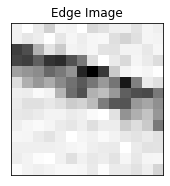

In [24]:
plt.subplot(122),plt.imshow(x_gray,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [25]:
gauss=[[0.0126,0.0252,0.0314,0.0252,0.0126],
       [0.0252,0.0566,0.0755,0.0566,0.0252],
       [0.0314,0.0755,0.0943,0.0755,0.0314],
       [0.0252,0.0566,0.0755,0.0566,0.0252],
       [0.0126,0.0252,0.0314,0.0252,0.0126]]
gauss

[[0.0126, 0.0252, 0.0314, 0.0252, 0.0126],
 [0.0252, 0.0566, 0.0755, 0.0566, 0.0252],
 [0.0314, 0.0755, 0.0943, 0.0755, 0.0314],
 [0.0252, 0.0566, 0.0755, 0.0566, 0.0252],
 [0.0126, 0.0252, 0.0314, 0.0252, 0.0126]]

In [26]:
im_gray = cv2.imread('data2/1.jpg',cv2.IMREAD_GRAYSCALE)
x=np.array([])
for i in range(10):
    for j in range(10):
        x=np.append(x,im_gray[50+i][75+j])
x_gray = x.reshape(10,10)

TypeError: 'NoneType' object is not subscriptable

In [27]:
# result = np.dot( x_gray, gauss)
# result

In [28]:
conv = ndimage.convolve(x_gray, gauss)
conv

array([[238.2687, 239.0078, 240.0371, 241.7678, 244.382 , 246.4133,
        246.4823, 244.8908, 243.1479, 242.0861, 242.3437, 243.4566,
        245.2869, 246.8345],
       [216.0725, 219.6564, 224.5248, 229.2021, 233.3805, 237.0658,
        240.6036, 242.5422, 242.7259, 242.3116, 242.4193, 243.4192,
        245.0356, 246.2627],
       [192.0208, 197.1007, 203.421 , 209.1647, 213.2872, 217.3406,
        223.1568, 229.4622, 234.3241, 238.3305, 241.2658, 243.7397,
        245.3243, 245.9668],
       [182.8755, 185.7976, 188.5263, 191.1541, 192.675 , 194.7612,
        199.4538, 207.4741, 216.5894, 226.0871, 233.3454, 238.7485,
        242.4778, 244.7334],
       [195.0272, 194.131 , 191.5734, 188.7858, 184.7414, 180.9764,
        181.2807, 188.1972, 198.4883, 208.764 , 216.4828, 223.9629,
        230.9243, 235.572 ],
       [217.705 , 214.6663, 209.3056, 202.5256, 193.3423, 184.1779,
        179.9321, 183.2734, 188.6199, 192.9423, 196.5475, 203.4963,
        212.8126, 220.1028],
       [23

In [29]:
sobel_horizontal = cv2.Sobel(conv, cv2.CV_64F, 1, 0, ksize=3)
sobel_vertical = cv2.Sobel(conv, cv2.CV_64F, 0, 1, ksize=3)

In [30]:
sobel_horizontal

array([[  0.    ,  20.4414,  24.6114,  26.4012,  25.0184,  18.6468,
          7.9078,  -2.4242,  -6.0706,  -2.2216,   4.9562,  11.119 ,
         12.4428,   0.    ],
       [  0.    ,  30.0732,  33.9154,  31.9225,  28.5488,  26.4161,
         21.5519,  12.0775,   5.6024,   5.5243,   8.9949,  12.2343,
         11.292 ,   0.    ],
       [  0.    ,  36.9035,  39.0302,  32.7368,  27.8226,  33.7411,
         42.4325,  41.5925,  36.119 ,  30.3328,  24.5874,  19.8657,
         13.2826,   0.    ],
       [  0.    ,  19.248 ,  17.4318,  11.3316,   7.5807,  19.9665,
         44.7682,  62.6461,  66.6611,  58.4482,  45.9309,  36.7648,
         25.806 ,   0.    ],
       [  0.    ,  -9.6562, -17.4746, -25.4786, -30.3594, -13.5528,
         26.25  ,  60.2386,  69.4155,  60.6726,  53.6132,  54.2805,
         45.8096,   0.    ],
       [  0.    , -25.9814, -39.6205, -55.1258, -65.0287, -46.2131,
         -0.6104,  32.2099,  33.5565,  26.6536,  37.5444,  58.9647,
         59.2759,   0.    ],
       [  

In [31]:
sobel_vertical

array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [-1.763100e+02, -1.666782e+02, -1.477424e+02, -1.329171e+02,
        -1.238654e+02, -1.125657e+02, -9.115230e+01, -6.300650e+01,
        -3.683180e+01, -1.741290e+01, -5.628300e+00, -4.743000e-01,
        -5.098000e-01, -1.660600e+00],
       [-1.341116e+02, -1.369131e+02, -1.439038e+02, -1.528000e+02,
        -1.617636e+02, -1.664645e+02, -1.596723e+02, -1.374225e+02,
        -1.035656e+02, -6.765940e+01, -3.904300e+01, -2.097310e+01,
        -1.131560e+01, -8.174200e+00],
       [ 7.340000e-02, -1.478060e+01, -4.704380e+01, -8.115120e+01,
        -1.138347e+02, -1.431503e+02, -1.613814e+02, -1.602419e+02,
        -1.425031e+02, -1.197518e+02, -9.890930e+01, -7.873660e+01,
        -5.897160e+01, -4.958960e+01],
       [ 1.273964e+02,  1.13

In [32]:
sudut = math.atan(math.sqrt(sobel_vertical[0][0]**2+sobel_horizontal[0][0]**2))
sudut

0.0

In [33]:
x=np.array([])
for i in range(10):
    for j in range(10):
        g = math.sqrt(sobel_vertical[0+i][0+j]**2+sobel_horizontal[0+i][0+j]**2)
        x = np.append(x,g)

In [34]:
x = x.reshape(10,10)
x

array([[0.00000000e+00, 2.04414000e+01, 2.46114000e+01, 2.64012000e+01,
        2.50184000e+01, 1.86468000e+01, 7.90780000e+00, 2.42420000e+00,
        6.07060000e+00, 2.22160000e+00],
       [1.76310000e+02, 1.69369477e+02, 1.51585194e+02, 1.36696750e+02,
        1.27112829e+02, 1.15623731e+02, 9.36655016e+01, 6.41536051e+01,
        3.72554476e+01, 1.82681958e+01],
       [1.34111600e+02, 1.41799384e+02, 1.49102851e+02, 1.56267521e+02,
        1.64138842e+02, 1.69849615e+02, 1.65214286e+02, 1.43578827e+02,
        1.09683252e+02, 7.41476444e+01],
       [7.34000000e-02, 2.42683259e+01, 5.01695801e+01, 8.19385283e+01,
        1.14086835e+02, 1.44536049e+02, 1.67475813e+02, 1.72052319e+02,
        1.57323983e+02, 1.33254215e+02],
       [1.27396400e+02, 1.13756772e+02, 8.36445176e+01, 5.10086248e+01,
        3.04335251e+01, 4.22535067e+01, 7.83552646e+01, 1.13243453e+02,
        1.32860414e+02, 1.44419880e+02],
       [1.54700200e+02, 1.54623655e+02, 1.50799438e+02, 1.42418980e+02,
   

In [35]:
x=np.array([])
for i in range(10):
    for j in range(10):
        teta = math.atan(sobel_vertical[0+i][0+j]/sobel_horizontal[0+i][0+j])
        x = np.append(x,teta)

In [36]:
x = x.reshape(10,10)
x

array([[        nan,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        , -0.        , -0.        ],
       [-1.57079633, -1.3922901 , -1.34514809, -1.33509203, -1.34426978,
        -1.34029453, -1.33862172, -1.38140708, -1.41984571, -1.26358693],
       [-1.57079633, -1.30751367, -1.30594378, -1.35974089, -1.40046743,
        -1.3708132 , -1.31105236, -1.27689958, -1.23523125, -1.14934359],
       [ 1.57079633, -0.65486102, -1.21593796, -1.43205776, -1.50430058,
        -1.43221114, -1.30019448, -1.19811849, -1.13324957, -1.11673185],
       [ 1.57079633, -1.48580944, -1.36033091, -1.04777951, -0.06980871,
         1.24427541, -1.22917774, -1.00990766, -1.02105182, -1.13722701],
       [ 1.57079633, -1.4019655 , -1.30493919, -1.17334696, -1.03315927,
        -1.06723998, -1.56030293,  0.66666224, -0.56242788, -1.22184997],
       [ 1.57079633, -1.37046178, -1.26643891, -1.14320598, -1.08949841,
        -1.20806153, -1.44202643, -1.53459796

In [37]:
im_gray = cv2.imread('data2/1.jpg',cv2.IMREAD_GRAYSCALE)
x=np.array([])
for i in range(10):
    for j in range(10):
        x=np.append(x,im_gray[50+i][75+j])
x_gray = x.reshape(10,10)

TypeError: 'NoneType' object is not subscriptable

In [38]:
x_gray

array([[247., 255., 244., 229., 250., 248., 255., 234., 239., 246., 247.,
        240., 249., 246.],
       [247., 241., 245., 254., 241., 250., 245., 250., 251., 237., 231.,
        238., 249., 248.],
       [149., 158., 212., 240., 226., 248., 246., 250., 240., 239., 248.,
        248., 242., 250.],
       [153., 149., 167., 143., 139., 160., 181., 236., 255., 243., 234.,
        249., 244., 236.],
       [203., 197., 192., 172., 182., 196., 135., 115., 146., 226., 248.,
        252., 249., 254.],
       [236., 211., 198., 209., 191., 177., 164., 180., 199., 179., 128.,
        185., 244., 237.],
       [246., 245., 252., 248., 214., 175., 159., 212., 219., 199., 167.,
        158., 155., 182.],
       [244., 238., 238., 242., 237., 227., 231., 218., 183., 163., 161.,
        199., 206., 194.],
       [242., 241., 244., 248., 248., 244., 246., 252., 255., 239., 196.,
        211., 222., 198.],
       [246., 250., 252., 249., 244., 241., 246., 237., 245., 245., 227.,
        236., 226

In [39]:
im_canny = cv2.Canny(im_gray,75,150)
x=np.array([])
for i in range(10):
    for j in range(10):
        x=np.append(x,im_canny[50+i][75+j])
x_canny = x.reshape(10,10)
x_canny

TypeError: 'NoneType' object is not subscriptable

In [40]:
moments = cv2.moments(x_canny)
moments

{'m00': 6630.0,
 'm10': 32895.0,
 'm01': 20910.0,
 'm20': 221085.0,
 'm11': 121380.0,
 'm02': 92310.0,
 'm30': 1634805.0,
 'm21': 857820.0,
 'm12': 561510.0,
 'm03': 449310.0,
 'mu20': 57875.19230769231,
 'mu11': 17634.23076923075,
 'mu02': 26363.076923076922,
 'mu30': -36416.71597633138,
 'mu21': -14433.905325443775,
 'mu12': -7720.917159763325,
 'mu03': -8111.715976331383,
 'nu20': 0.001316634983533696,
 'nu11': 0.00040117093719599774,
 'nu02': 0.00059974831990147,
 'nu30': -1.0174590942858393e-05,
 'nu21': -4.0327382208155476e-06,
 'nu12': -2.157173476470124e-06,
 'nu03': -2.266360095662185e-06}

In [41]:
x=0
y=0
m00 = 0**x*3**y*x_canny[0][3]+0**x*4**y*x_canny[0][4]+1**x*4**y*x_canny[1][4]+2**x*2**y*x_canny[2][2]+2**x*5**y*x_canny[2][5]+3**x*3**y*x_canny[3][3]+3**x*6**y*x_canny[3][6]+4**x*4**y*x_canny[4][4]+4**x*7**y*x_canny[4][7]+5**x*5**y*x_canny[5][5]+5**x*8**y*x_canny[5][8]+6**x*5**y*x_canny[6][5]+6**x*6**y*x_canny[6][6]+6**x*9**y*x_canny[6][9]+7**x*6**y*x_canny[7][6]+7**x*7**y*x_canny[7][7]+8**x*8**y*x_canny[8][8]+8**x*9**y*x_canny[8][9]


m00

1275.0

In [42]:
x=0
y=1
m01 = 0**x*3**y*x_canny[0][3]+0**x*4**y*x_canny[0][4]+1**x*4**y*x_canny[1][4]+2**x*2**y*x_canny[2][2]+2**x*5**y*x_canny[2][5]+3**x*3**y*x_canny[3][3]+3**x*6**y*x_canny[3][6]+4**x*4**y*x_canny[4][4]+4**x*7**y*x_canny[4][7]+5**x*5**y*x_canny[5][5]+5**x*8**y*x_canny[5][8]+6**x*5**y*x_canny[6][5]+6**x*6**y*x_canny[6][6]+6**x*9**y*x_canny[6][9]+7**x*6**y*x_canny[7][6]+7**x*7**y*x_canny[7][7]+8**x*8**y*x_canny[8][8]+8**x*9**y*x_canny[8][9]


m01

7395.0

In [43]:
x=1
y=0
m10 = 0**x*3**y*x_canny[0][3]+0**x*4**y*x_canny[0][4]+1**x*4**y*x_canny[1][4]+2**x*2**y*x_canny[2][2]+2**x*5**y*x_canny[2][5]+3**x*3**y*x_canny[3][3]+3**x*6**y*x_canny[3][6]+4**x*4**y*x_canny[4][4]+4**x*7**y*x_canny[4][7]+5**x*5**y*x_canny[5][5]+5**x*8**y*x_canny[5][8]+6**x*5**y*x_canny[6][5]+6**x*6**y*x_canny[6][6]+6**x*9**y*x_canny[6][9]+7**x*6**y*x_canny[7][6]+7**x*7**y*x_canny[7][7]+8**x*8**y*x_canny[8][8]+8**x*9**y*x_canny[8][9]


m10

4335.0

In [44]:
x_=m10/m00
x_

3.4

In [45]:
y_=m01/m00
y_

5.8

In [46]:
x=2
y=0
mu20 = (0-x_)**x*(3-y_)**y*x_canny[0][3]+(0-x_)**x*(4-y_)**y*x_canny[0][4]+(1-x_)**x*(4-y_)**y*x_canny[1][4]+(2-x_)**x*(2-y_)**y*x_canny[2][2]+(2-x_)**x*(5-y_)**y*x_canny[2][5]+(3-x_)**x*(3-y_)**y*x_canny[3][3]+(3-x_)**x*(6-y_)**y*x_canny[3][6]+(4-x_)**x*(4-y_)**y*x_canny[4][4]+(4-x_)**x*(7-y_)**y*x_canny[4][7]+(5-x_)**x*(5-y_)**y*x_canny[5][5]+(5-x_)**x*(8-y_)**y*x_canny[5][8]+(6-x_)**x*(5-y_)**y*x_canny[6][5]+(6-x_)**x*(6-y_)**y*x_canny[6][6]+(6-x_)**x*(9-y_)**y*x_canny[6][9]+(7-x_)**x*(6-y_)**y*x_canny[7][6]+(7-x_)**x*(7-y_)**y*x_canny[7][7]+(8-x_)**x*(8-y_)**y*x_canny[8][8]+(8-x_)**x*(9-y_)**y*x_canny[8][9]


mu20

7956.0

In [47]:
x=0
y=2
mu02 = (0-x_)**x*(3-y_)**y*x_canny[0][3]+(0-x_)**x*(4-y_)**y*x_canny[0][4]+(1-x_)**x*(4-y_)**y*x_canny[1][4]+(2-x_)**x*(2-y_)**y*x_canny[2][2]+(2-x_)**x*(5-y_)**y*x_canny[2][5]+(3-x_)**x*(3-y_)**y*x_canny[3][3]+(3-x_)**x*(6-y_)**y*x_canny[3][6]+(4-x_)**x*(4-y_)**y*x_canny[4][4]+(4-x_)**x*(7-y_)**y*x_canny[4][7]+(5-x_)**x*(5-y_)**y*x_canny[5][5]+(5-x_)**x*(8-y_)**y*x_canny[5][8]+(6-x_)**x*(5-y_)**y*x_canny[6][5]+(6-x_)**x*(6-y_)**y*x_canny[6][6]+(6-x_)**x*(9-y_)**y*x_canny[6][9]+(7-x_)**x*(6-y_)**y*x_canny[7][6]+(7-x_)**x*(7-y_)**y*x_canny[7][7]+(8-x_)**x*(8-y_)**y*x_canny[8][8]+(8-x_)**x*(9-y_)**y*x_canny[8][9]


mu02

5814.0

In [48]:
x=0
y=2
nu02 = mu02/m00**((x+y)/2+1)
nu02

0.0035764705882352942

In [49]:
x=2
y=0
nu20 = mu20/m00**((x+y)/2+1)
nu20

0.004894117647058823

In [50]:
h0 = nu02 + nu20
h0

0.008470588235294117

In [51]:
huMoments = cv2.HuMoments(moments)
huMoments

array([[ 1.91638330e-03],
       [ 1.15767897e-06],
       [ 1.10378095e-10],
       [ 1.91751053e-10],
       [ 2.73056176e-20],
       [ 2.05223821e-13],
       [-5.71070104e-21]])

In [52]:
for i in range(0,7):
    huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))

In [53]:
huMoments

array([[  2.71751762],
       [  5.93641186],
       [  9.9571171 ],
       [  9.71726224],
       [ 19.563748  ],
       [ 12.68777223],
       [-20.24331058]])